### Creating Plots for the Watertank case study

First import all required libraries

In [64]:
import matplotlib.pylab as plt
import numpy as np

Read in data from file. We assume that each line in the file contains a sequence of Boolean values, all sequences are expected to have the same length. 

In [65]:
# open file
file = open("experiment_3/baseControllerInvocations", 'r')
#file = open("adaptationInvocations", 'r')
#file = open("baseControllerInvocations", 'r')

# read in files
invocations = []
for line in file:
    # filter out empty strings
    str_list = list(filter(lambda p : p!='\n', line.split(",")))
    invocations.append(str_list)

   

For a fixed window-size we compute the number of occurrences of "1", i.e., the number of cases per window in which the base controller was invoked. Use matplotlib to visualize the results

Have 493.7586206896551 invocations on average
On average, no more invocations happen after cycle 88.52216748768471
[  0  25  50  75 100 125 150 175 200 225 250 275 300 325 350 375 400 425
 450 475 500 525 550 575]


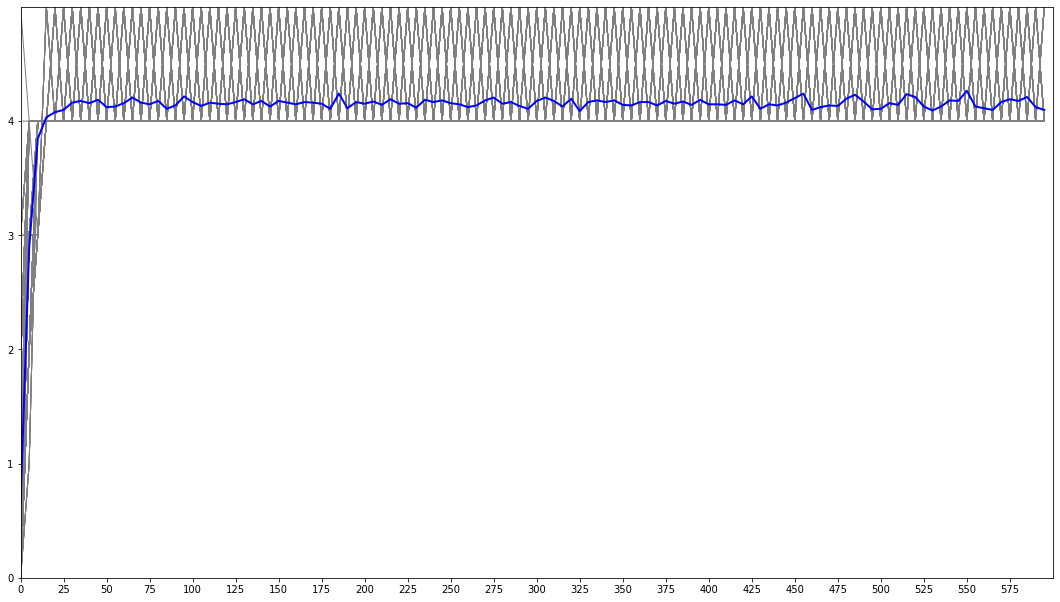

Have 493.7586206896551 invocations on average
On average, no more invocations happen after cycle 88.52216748768471
[  0  50 100 150 200 250 300 350 400 450 500 550]


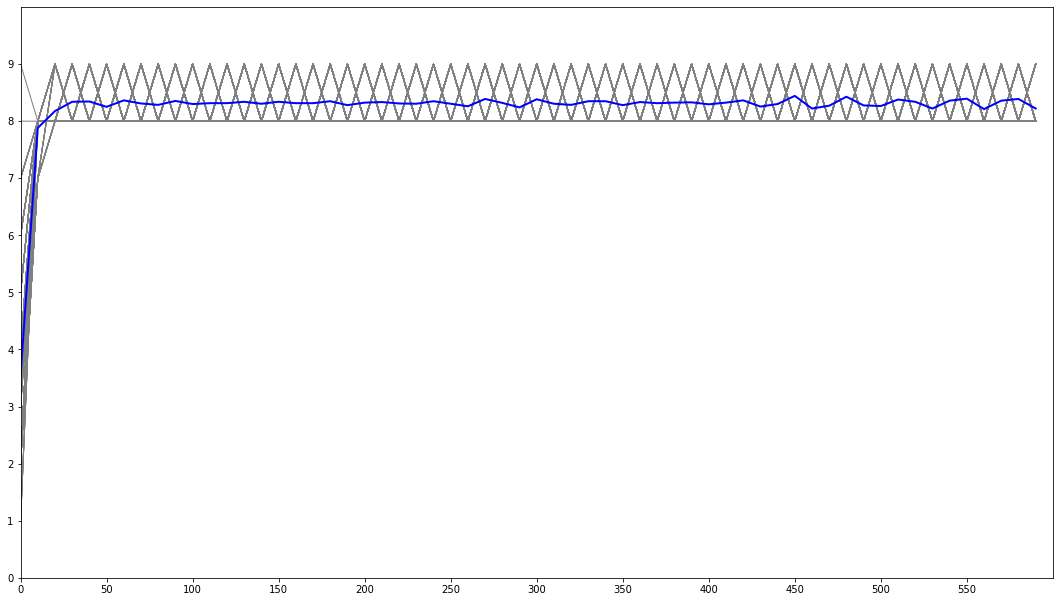

Have 493.7586206896551 invocations on average
On average, no more invocations happen after cycle 88.52216748768471
[  0  75 150 225 300 375 450 525]


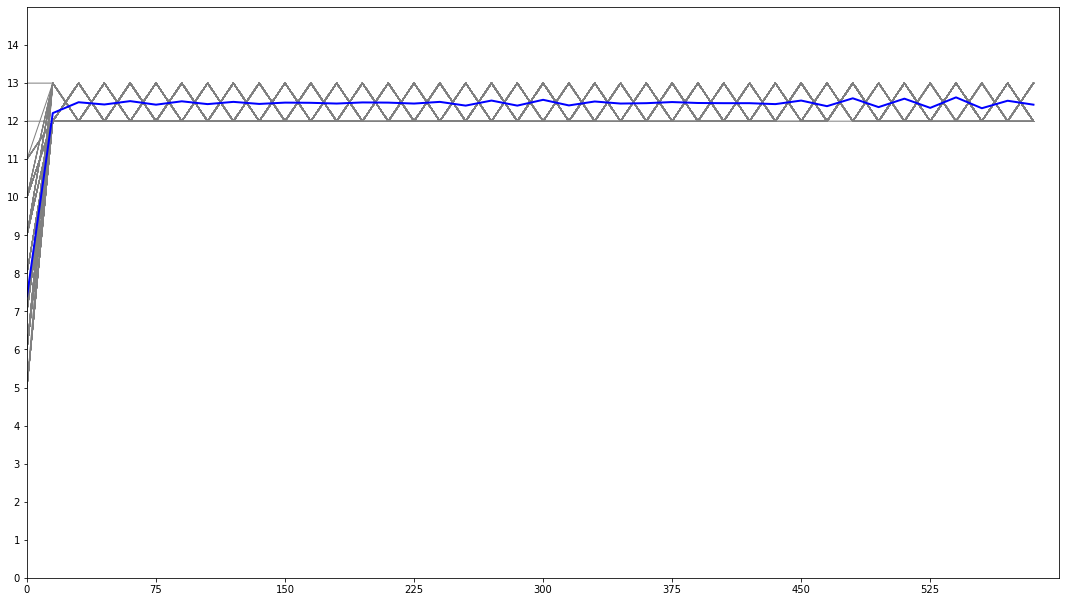

Have 493.7586206896551 invocations on average
On average, no more invocations happen after cycle 88.52216748768471
[  0 100 200 300 400 500]


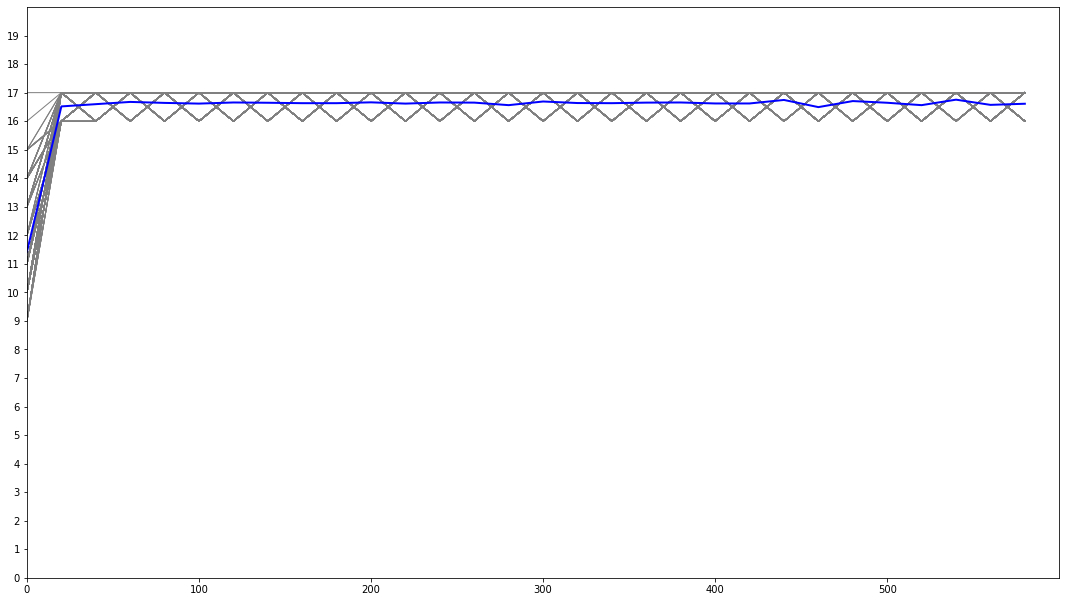

In [66]:
for window in (5,10,15,20):
    numberClusters = int(len(invocations[0])/window) + (len(invocations[0]) % window > 0)
    #print("use " + str(numberClusters) + " cluster")
    frequencies = []
    average = [0 for i in range(numberClusters)]
    averageSum = 0
    averageZero = 0
    for i in range(len(invocations)):
        averageSum = averageSum + invocations[i].count('1')/len(invocations)
        frequencies.append([])
    
        for j in range(numberClusters):
            frequencies[i].append(invocations[i][j*window : (j+1)*window].count('1'))
            average[j] = average[j] + frequencies[i][j]/len(invocations)

        # find point in time when no more invocations happen
        
        j = 0
        while j != len(invocations[i]):
            if invocations[i][j] == '0':
                isFirstZero = True
                # check whether this is the first instance after which never a 1 is reported again
                
                k = j+1
                while k != len(invocations[i]):
                    if not invocations[i][k] == '0':
                        isFirstZero = False
                        j = k
                        break
                    k = k + 1
                # if this is it, add it to the average value
                if isFirstZero:
                    averageZero = averageZero + j/len(invocations)
                    break
            j = j + 1
        
            
    print("Have " + str(averageSum) + " invocations on average")
    print("On average, no more invocations happen after cycle " + str(averageZero))

    foundZeroAverage = False
    
    for j in range(len(average)):
        if not foundZeroAverage and average[j] == 0:
            totallyZero = True
            #print("Avg. is zero at " + str(j*window))
            for k in range(j+1, len(average)):
                if not average[k] == 0:
                    totallyZero = False
            if totallyZero:
                print("Average becomes totally zero at iteration " + str(j*window))
                foundZeroAverage = True
        if j>1 and average[j] < 1 and average[j-1] > 1:
            # find point where the average drops below 1/window
            p = average[j]
            u = average[j-1]
            slope = (p-u)/window
            
            off = (1-u)/slope + (j-1)*window
            print("Averages: p=" + str(p) + ", u=" + str(u) + " at points " + str(j*window) + " and " + str((j-1)*window) + ", average should be one at " + str(off))


    #plt.style.use('_mpl-gallery')
    fig, ax = plt.subplots()
    fig.set_size_inches(18.5, 10.5, forward=True)

    for i in range(len(frequencies)):
        ax.plot(range(len(frequencies[i])), frequencies[i], linewidth=1.0, color="gray")
        
    ax.plot(range(len(average)), average, linewidth=2.0, color="blue")

    ax.set(xlim=(0, len(frequencies[0])), ylim=(0, window), yticks=np.arange(0, window))

    plt.xticks(np.arange(0, len(frequencies[0]), 5), np.arange(0, 600, 5*window))
    print(str(np.arange(0, 600, 5*window)))

    plt.show()